In [1]:
"""
Establishing baseline embedding / sim search performance with DINOv2 CLS token
@File    : baseline_with_cls.ipynb
@Date    : 2026-01-12
@Author  : Nandini Bohra
@Contact : nbohra@ucsd.edu
"""

'\nEstablishing baseline embedding / sim search performance with DINOv2 CLS token\n@File    : baseline_with_cls.ipynb\n@Date    : 2026-01-12\n@Author  : Nandini Bohra\n@Contact : nbohra@ucsd.edu\n'

In [ ]:
# Clean up / combine baselines for ease

In [2]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import pandas as pd
from image_extraction import sample_data


{'/Users/nandinibohra/Desktop/VSCodeFiles/ImageRecommendation_ProductMatching/Product_Catalog/all_product_images/sample_images/sample_00.jpg': ['JUTE', 'CREAM'], '/Users/nandinibohra/Desktop/VSCodeFiles/ImageRecommendation_ProductMatching/Product_Catalog/all_product_images/sample_images/sample_01.jpg': ['AURA', 'ROSE'], '/Users/nandinibohra/Desktop/VSCodeFiles/ImageRecommendation_ProductMatching/Product_Catalog/all_product_images/sample_images/sample_02.jpg': ['AURA', 'MINT'], '/Users/nandinibohra/Desktop/VSCodeFiles/ImageRecommendation_ProductMatching/Product_Catalog/all_product_images/sample_images/sample_03.jpg': ['SURFACE', 'OFFWHITE'], '/Users/nandinibohra/Desktop/VSCodeFiles/ImageRecommendation_ProductMatching/Product_Catalog/all_product_images/sample_images/sample_04.jpg': ['SURFACE', 'COFFEE'], '/Users/nandinibohra/Desktop/VSCodeFiles/ImageRecommendation_ProductMatching/Product_Catalog/all_product_images/sample_images/sample_05.jpg': ['AURA', 'BROWN'], '/Users/nandinibohra/Desk

In [3]:
payloads = pd.read_csv("payloads.csv")

In [6]:
# Trying DINO V2 model 
# https://huggingface.co/facebook/dinov2-base

from transformers import AutoImageProcessor, AutoModel
import torch

processor = AutoImageProcessor.from_pretrained('facebook/dinov2-base')
model = AutoModel.from_pretrained('facebook/dinov2-base')
model.eval()

def get_cls_dinov2(img_path):
    image = Image.open(img_path).convert('RGB')
    inputs = processor(image, return_tensors="pt")

    with torch.no_grad():
        outputs = model(**inputs)

    cls = outputs.last_hidden_state[:, 0,:]
    print(cls.shape)

    norm_emb = cls / cls.norm(dim=-1, keepdim=True)

    return norm_emb.squeeze(0).numpy()

/Users/nandinibohra/Desktop/VSCodeFiles/ImageRecommendation_ProductMatching/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [7]:
embeddings = []

for img_path in payloads["image_url"]:
    emb = get_cls_dinov2(img_path)
    embeddings.append(emb)

embeddings = np.array(embeddings)
print(f"Embeddings shape: {embeddings.shape}")

torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1

In [8]:
similarity_matrix = cosine_similarity(embeddings)

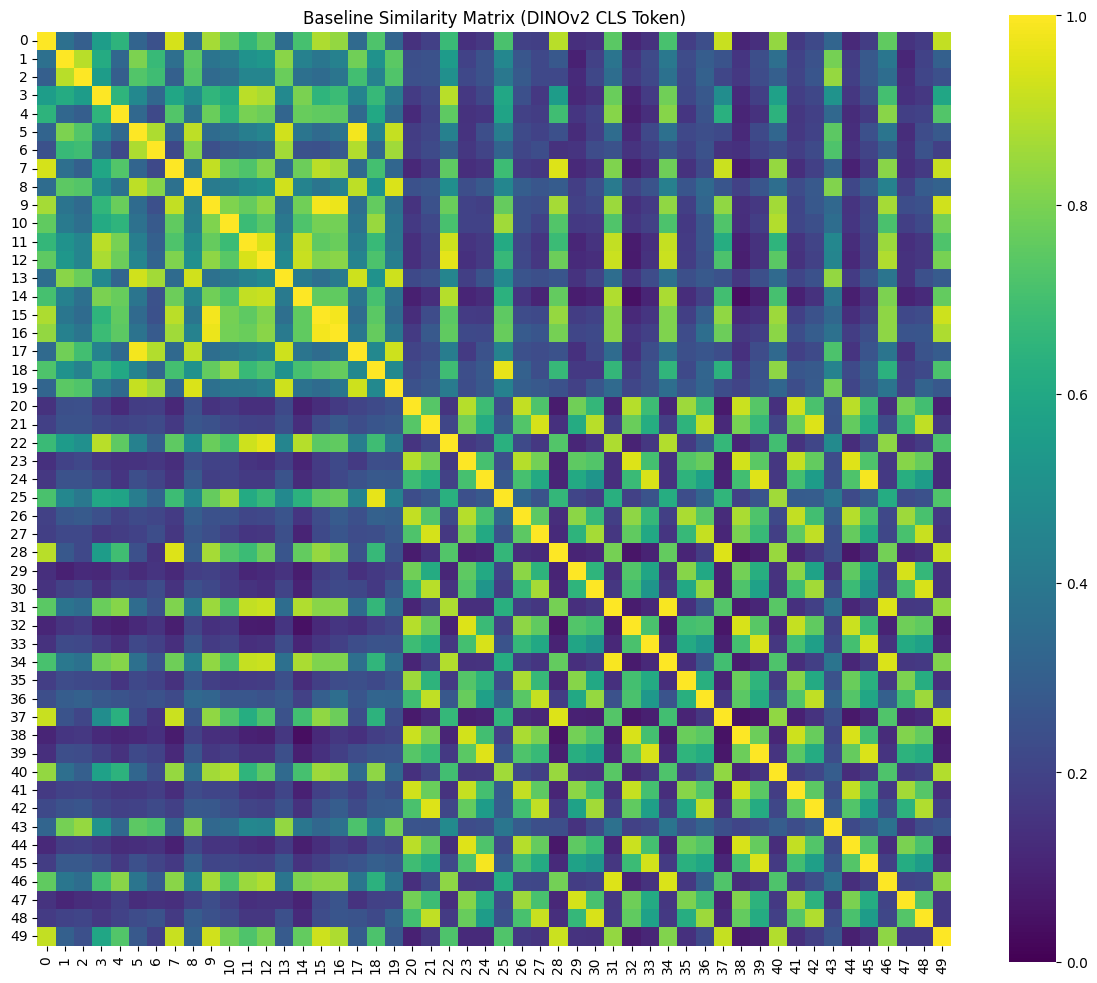

In [9]:
plt.figure(figsize=(12, 10))
sns.heatmap(
    similarity_matrix,
    xticklabels=payloads["id"],
    yticklabels=payloads["id"],
    cmap='viridis',
    vmin=0, vmax=1,
    square=True
)
plt.title('Baseline Similarity Matrix (DINOv2 CLS Token)')
plt.tight_layout()
# plt.savefig('baseline_similarity_matrix_CLS.png')
plt.show()


Similarity Statistics (CLS Token):
  Mean: 0.418
  Std:  0.279
  Min:  0.039
  Max:  0.991


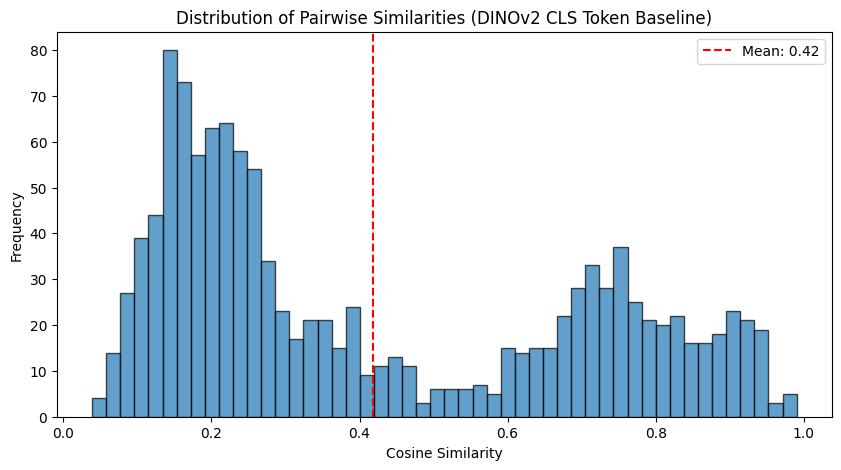

In [10]:
upper_tri_indices = np.triu_indices_from(similarity_matrix, k=1)
similarities = similarity_matrix[upper_tri_indices]

print("\nSimilarity Statistics (CLS Token):")
print(f"  Mean: {similarities.mean():.3f}")
print(f"  Std:  {similarities.std():.3f}")
print(f"  Min:  {similarities.min():.3f}")
print(f"  Max:  {similarities.max():.3f}")

# Plot distribution
plt.figure(figsize=(10, 5))
plt.hist(similarities, bins=50, edgecolor='black', alpha=0.7)
plt.axvline(similarities.mean(), color='red', linestyle='--', label=f'Mean: {similarities.mean():.2f}')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.title('Distribution of Pairwise Similarities (DINOv2 CLS Token Baseline)')
plt.legend()
# plt.savefig('baseline_distribution_CLS.png')
plt.show()

In [11]:
# Trying to understand the bimodal distribution above
# Why certain similarity 'buckets'?
upper_tri = np.triu_indices_from(similarity_matrix, k=1)
similarities = similarity_matrix[upper_tri]
pair_indices = list(zip(upper_tri[0], upper_tri[1]))

# Split into low and high similarity groups
threshold = 0.5  # Adjust based on your histogram valley
low_sim_pairs = [(i, j) for (i, j), sim in zip(pair_indices, similarities) if sim < threshold]
high_sim_pairs = [(i, j) for (i, j), sim in zip(pair_indices, similarities) if sim >= threshold]

print(f"Low similarity pairs (<{threshold}): {len(low_sim_pairs)}")
print(f"High similarity pairs (≥{threshold}): {len(high_sim_pairs)}")

Low similarity pairs (<0.5): 781
High similarity pairs (≥0.5): 444


In [12]:
materials = payloads["material"]
colors = payloads["color"]

# Check how well color and material matches are in each peak
# Understand reason behind two peaks

def check_metadata_match(pairs, metadata_list, name):
    matches = 0
    for i, j in pairs:
        if metadata_list[i] == metadata_list[j]:
            matches += 1
    
    match_rate = matches / len(pairs) if pairs else 0
    print(f"\n{name} match rate in pairs: {match_rate:.1%}")
    return match_rate

print("LOW SIMILARITY PAIRS (Left peak)")
print("="*50)
low_material_match = check_metadata_match(low_sim_pairs, materials, "Material")
low_color_match = check_metadata_match(low_sim_pairs, colors, "Color")

print()
print()
print("HIGH SIMILARITY PAIRS (Right peak)")
print("="*50)
high_material_match = check_metadata_match(high_sim_pairs, materials, "Material")
high_color_match = check_metadata_match(high_sim_pairs, colors, "Color")


LOW SIMILARITY PAIRS (Left peak)

Material match rate in pairs: 0.0%

Color match rate in pairs: 4.0%


HIGH SIMILARITY PAIRS (Right peak)

Material match rate in pairs: 33.3%

Color match rate in pairs: 6.1%


In [13]:
print("\n" + "="*50)
print("EXAMPLE LOW SIMILARITY PAIRS")
print("="*50)
for i, j in low_sim_pairs[:5]:
    sim = similarity_matrix[i, j]
    print(f"\nPair: {payloads["id"][i]} ↔ {payloads["id"][j]}")
    print(f"  Similarity: {sim:.3f}")
    print(f"  Material: {materials[i]} ↔ {materials[j]}")
    print(f"  Color: {colors[i]} ↔ {colors[j]}")

print("\n" + "="*50)
print("EXAMPLE HIGH SIMILARITY PAIRS")
print("="*50)
for i, j in high_sim_pairs[:5]:
    sim = similarity_matrix[i, j]
    print(f"\nPair: {payloads["id"][i]} ↔ {payloads["id"][j]}")
    print(f"  Similarity: {sim:.3f}")
    print(f"  Material: {materials[i]} ↔ {materials[j]}")
    print(f"  Color: {colors[i]} ↔ {colors[j]}")


EXAMPLE LOW SIMILARITY PAIRS

Pair: 0 ↔ 1
  Similarity: 0.367
  Material: JUTE ↔ AURA
  Color: CREAM ↔ ROSE

Pair: 0 ↔ 2
  Similarity: 0.298
  Material: JUTE ↔ AURA
  Color: CREAM ↔ MINT

Pair: 0 ↔ 5
  Similarity: 0.320
  Material: JUTE ↔ AURA
  Color: CREAM ↔ BROWN

Pair: 0 ↔ 6
  Similarity: 0.247
  Material: JUTE ↔ AURA
  Color: CREAM ↔ PEACOCK

Pair: 0 ↔ 8
  Similarity: 0.348
  Material: JUTE ↔ AURA
  Color: CREAM ↔ BUFF

EXAMPLE HIGH SIMILARITY PAIRS

Pair: 0 ↔ 3
  Similarity: 0.554
  Material: JUTE ↔ SURFACE
  Color: CREAM ↔ OFFWHITE

Pair: 0 ↔ 4
  Similarity: 0.648
  Material: JUTE ↔ SURFACE
  Color: CREAM ↔ COFFEE

Pair: 0 ↔ 7
  Similarity: 0.934
  Material: JUTE ↔ JUTE
  Color: CREAM ↔ MAIZE

Pair: 0 ↔ 9
  Similarity: 0.867
  Material: JUTE ↔ JUTE
  Color: CREAM ↔ OAK

Pair: 0 ↔ 10
  Similarity: 0.757
  Material: JUTE ↔ CHORD
  Color: CREAM ↔ COFFEE
